In [1268]:
import pandas as pd
import numpy as np
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

print(df_train.shape)

(712, 12)


In [1269]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

In [1270]:
df_train_new=df_train.drop(columns=["Cabin","PassengerId","Name","Ticket"])
df_train_new = df_train_new.dropna()
mean_ages = df_train_new['Age'].mean()
print(mean_ages)
df_train_new['Age'].fillna(mean_ages,inplace=True)

29.81184668989547


In [1271]:
X_train = df_train_new.drop(columns=["Survived"])
y_train = df_train_new["Survived"]

X_test = df_test.drop(columns=["Survived"])
y_test = df_test["Survived"]

<function matplotlib.pyplot.show(close=None, block=None)>

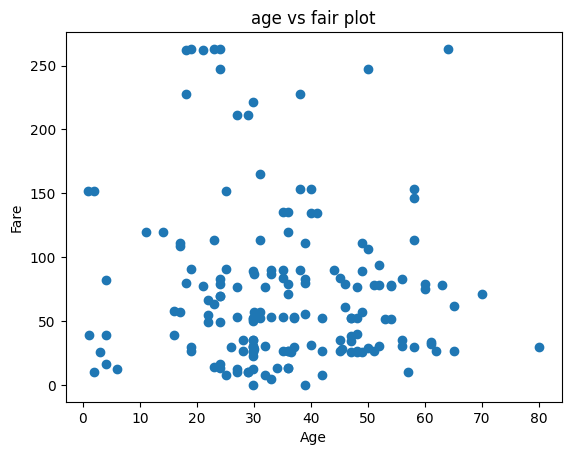

In [1272]:
import matplotlib 
from matplotlib import pyplot as plt
plt.scatter(df_train_new["Age"], df_train_new["Fare"])
plt.title("age vs fair plot")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show

In [1273]:
print("max fare",df_train_new["Fare"].max())
print("min fare",df_train_new["Fare"].min())
print("max age",df_train_new["Age"].max())
print("mean fare ",df_train_new["Fare"].mean())
print("mean age",df_train_new["Age"].mean())

max fare 263.0
min fare 0.0
max age 80.0
mean fare  73.15695325443788
mean age 35.31418757602622


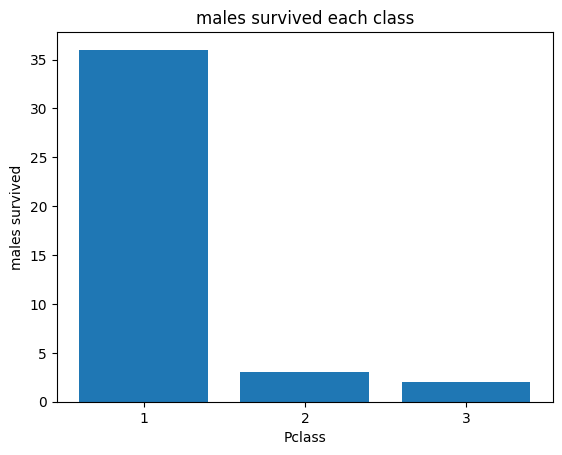

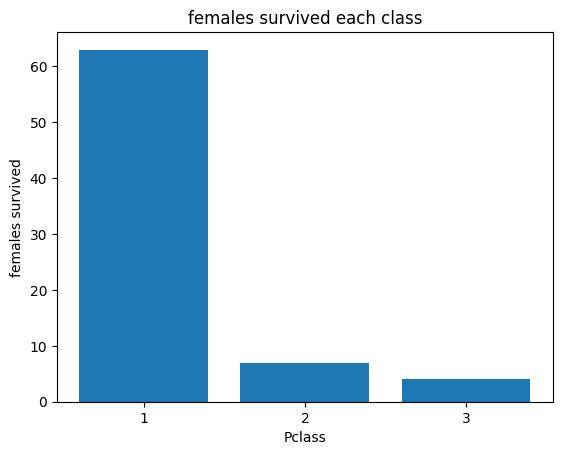

        Survived
Pclass          
1             36
2              3
3              2
        Survived
Pclass          
1             63
2              7
3              4
min males survived Survived    2
dtype: int64


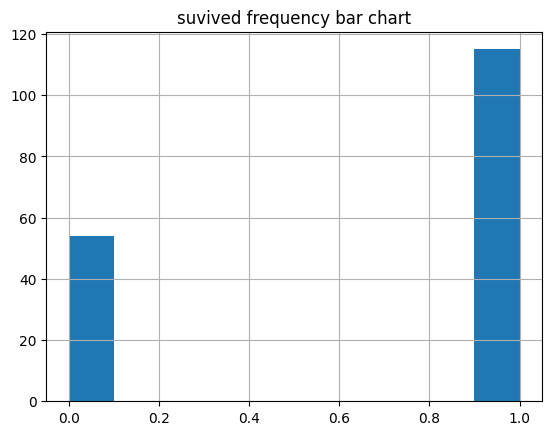

Text(0.5, 1.0, 'survived frequency each class')

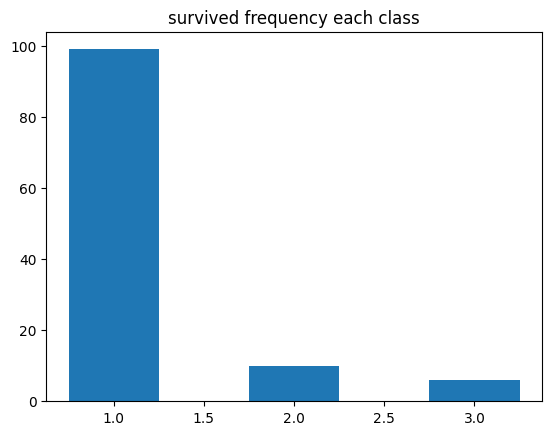

In [1274]:
total_survivors = df_train_new[["Sex","Pclass","Survived"]]

males_survived= total_survivors[total_survivors.Sex == 'male'].groupby("Pclass").sum('Survived')
plt.bar(males_survived.index.values,males_survived["Survived"])
plt.title("males survived each class")
plt.xticks(males_survived.index.values)
plt.xlabel("Pclass")
plt.ylabel("males survived")
plt.show()

temp = df_train_new[["Sex","Pclass","Survived"]]
females_survived= total_survivors[total_survivors.Sex == 'female'].groupby("Pclass").sum('Survived')
plt.bar(females_survived.index.values,females_survived["Survived"])
plt.title("females survived each class")
plt.xticks(females_survived.index.values)
plt.xlabel("Pclass")
plt.ylabel("females survived")
plt.show()

print(males_survived)
print(females_survived)

print("min males survived",males_survived.min())

y_train.hist()
plt.title("suvived frequency bar chart")
plt.show()

cumulative_survivors=total_survivors.groupby("Pclass").sum('Survived')
plt.bar(cumulative_survivors.index.values,cumulative_survivors["Survived"],width=0.5)
plt.title("survived frequency each class")

In [1275]:
print(X_train.shape)
X_train = pd.get_dummies(X_train,columns=["Sex","Embarked"])
print(X_train.shape)

(169, 7)
(169, 10)


In [1276]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)